In [ ]:
!pip install keras
!pip install tensorflow
!pip install tensorflow-gpu==2.2.0
!pip install tensorflow_datasets
!pip install torch

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.2.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.2.0


   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 2.8 MB/s eta 0:01:14
   ---------------------------------------- 1.0/204.1 MB 3.6 MB/s eta 0:00:57
   ---------------------------------------- 1.8/204.1 MB 3.2 MB/s eta 0:01:03
   ---------------------------------------- 2.4/204.1 MB 3.3 MB/s eta 0:01:02
    --------------------------------------- 2.9/204.1 MB 3.1 MB/s eta 0:01:05
    --------------------------------------- 3.4/204.1 MB 3.0 MB/s eta 0:01:08
    --------------------------------------- 4.2/204.1 MB 2.9 MB/s eta 0:01:09
    --------------------------------------- 4.7/204.1 MB 2.9 MB/s eta 0:01:10
   - -------------------------------------- 5.2/204.1 MB 2.9 MB/s eta 0:01:09
   - -------------------------------------- 5.8/204.1 MB 2.9 MB/s eta 0:01:09
   - -------------------------------------- 6.3/204.1 MB 2.9 MB/s eta 0:01:10
   - -------------------------------------- 7.1/204.1 MB 2.9 MB/s eta 0

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
#from keras.preprocessing.image import image_dataset_from_directory
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from torch.utils.data import DataLoader, Dataset
from pathlib import Path

In [ ]:
DATASET_DIR = "D:/12320158/Datasets/SugarcaneDataset"
CLASS_NAMES = ["Healthy", "Mosaic", "RedRot", "Rust", "Yellow"]
NUM_CLASSES = len(CLASS_NAMES)
INPUT_SIZE = 224
BATCH_SIZE = 32
NUM_WORKERS = 4
EPOCHS = 30
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5
MODEL_NAME = "timm/convnextv2_tiny.fcmae"
SEED = 1729

In [ ]:
train_dataset = image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    image_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE
)

val_dataset = image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    image_size=(INPUT_SIZE, INPUT_SIZE),
    batch_size=BATCH_SIZE
)

Found 2521 files belonging to 5 classes.
Using 1765 files for training.
Found 2521 files belonging to 5 classes.
Using 756 files for validation.


'\n# Load dataset\nimage_paths = []\nlabels = []\n\nfor i, class_name in enumerate(CLASS_NAMES):\n    class_dir = Path(DATASET_DIR) / class_name\n    class_images = list(class_dir.glob("*.jpg")) + list(class_dir.glob("*.jpeg")) + list(class_dir.glob("*.png"))\n    \n    image_paths.extend([str(img_path) for img_path in class_images])\n    labels.extend([i] * len(class_images))\n\nprint(f"Total images found: {len(image_paths)}")\n\n# Split dataset\ntrain_idx, temp_idx = train_test_split(\n    list(range(len(image_paths))), \n    test_size=0.3,\n    stratify=labels,\n    random_state=SEED\n)\n\nval_idx, test_idx = train_test_split(\n    temp_idx,\n    test_size=0.5,\n    stratify=[labels[i] for i in temp_idx],\n    random_state=SEED\n)\n\n# Create data loaders\ntrain_loader = DataLoader(\n    [(Image.open(image_paths[i]).convert(\'RGB\'), labels[i]) for i in train_idx],\n    batch_size=BATCH_SIZE,\n    shuffle=True,\n    num_workers=NUM_WORKERS,\n    pin_memory=True,\n    collate_fn=lamb

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 74, 74, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 512)      │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1568)           │    51,381,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        59,622 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,445,094 (238.21 MB)

 Trainable params: 62,445,094 (238.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ep = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=ep
)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 730ms/step - accuracy: 0.2305 - loss: 2.3613 - val_accuracy: 0.4669 - val_loss: 1.2844
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 792ms/step - accuracy: 0.4202 - loss: 1.3562 - val_accuracy: 0.3783 - val_loss: 1.7885
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 803ms/step - accuracy: 0.5446 - loss: 1.1106 - val_accuracy: 0.6521 - val_loss: 0.8767
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 782ms/step - accuracy: 0.6403 - loss: 0.9118 - val_accuracy: 0.7394 - val_loss: 0.7480
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 793ms/step - accuracy: 0.7275 - loss: 0.7221 - val_accuracy: 0.7646 - val_loss: 0.6299
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 808ms/step - accuracy: 0.7750 - loss: 0.6348 - val_accuracy: 0.7540 - val_loss: 0.6739
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 783ms/step - accuracy: 0.8027 - loss: 0.5037 - val_accuracy: 0.8108 - val_loss: 0.5470
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 781ms/step - accuracy: 0.8639 - loss: 0.3666 - val_accu

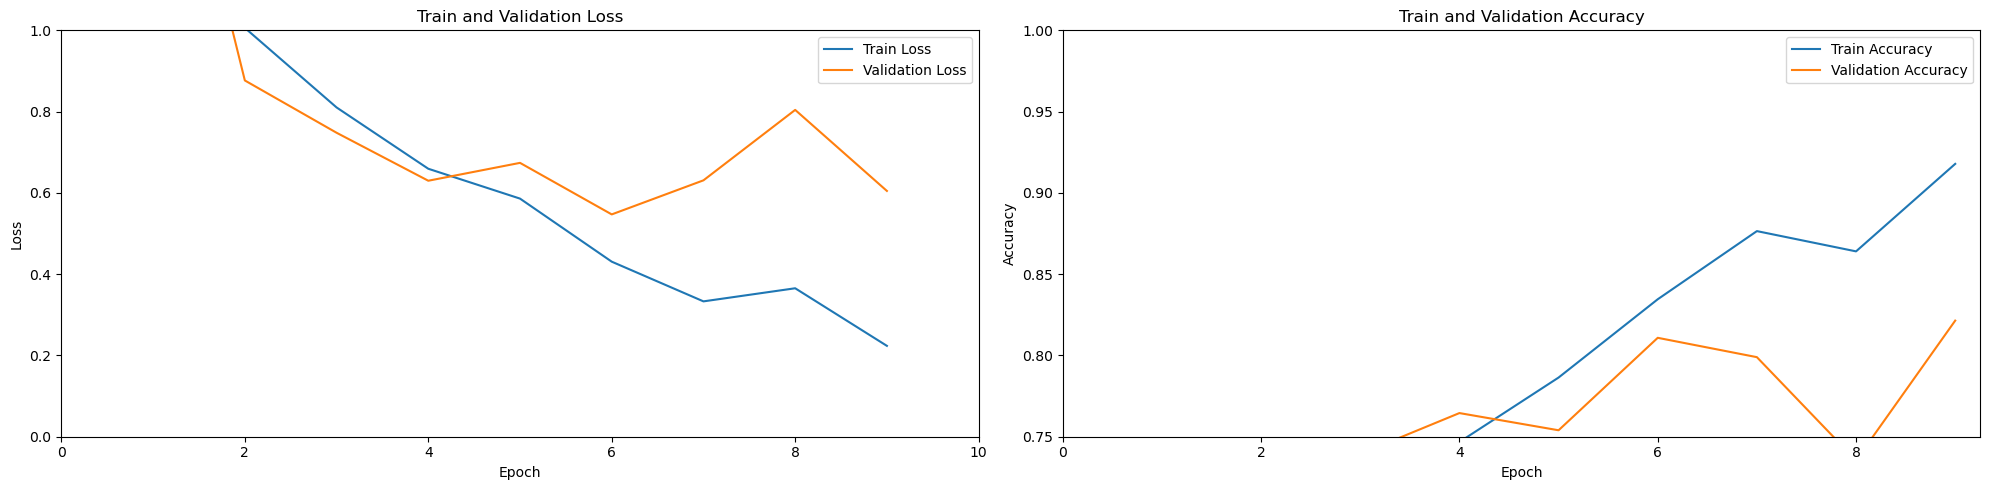

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in val_dataset:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 91.78 %
Test Accuracy   : 82.14 %
Precision Score : 82.14 %
Recall Score    : 82.14 %
